# Perceptron

## Contents

* Linear Regression
* Perceptron Model
* Perceptron Cost Function

The basis of Artificial Neural Networks (ANN) are Linear Threshold Unit (LTU) or Threshold Logic Unit (TLU). These take a weighted linear combination of the inputs and pass this through an _activation function_. The activation function transforms the signal and introduces nonlinearity into the network. An example of an LTU is sketched below.

![Perceptron-sketch.png](attachment:Perceptron-sketch.png)

## Linear Regression

The linear classification and regression models that we have previously considered, Linear Regression, Logistic Regression and Linear SVM, can all be formulated as an LTU.

Consider Linear Regression, in which case the activation function is simply $g(x) = x$. Linear regression can be written as choose the weights $\mathbf{w}$ such that

$$ \hbox{minimize:} \quad E = \frac{1}{2n} \sum_{i=1}^n (y^{(i)} - y^{(i)}_p)^2 + C \lVert \mathbf{w} \rVert, $$

where

$$ y^{(i)}_p = \sum_{j=0}^m w_j x_j^{(i)} = \mathbf{w} \cdot \mathbf{x}^{(i)}, $$

and we have introduced $x_0^{(i)} = 1$, which accounts for the model intercept. The term
$\lVert \mathbf{w} \rVert$ is a measure of the magnitude of the vector $\mathbf{w}$. For example, for Ridge regularization

$$ \lVert \mathbf{w} \rVert = \frac12 \sum_{j=1}^m w_j^2 = \frac12 \mathbf{w} \cdot \mathbf{w}. $$

We have used the dot product notation from Multivariable Calculus to simplify our notation.

## Perceptron Model

A simple binary classification model can be created by introducing a binary _activation function_. The resultant model is known as the Perceptron and was created to mimic brain neurons, where they have multiple inputs, but only fire if the input exceeds a critical value.

Assume $y^{(i)} \in \{ 0,1 \}$ (it only has the two possible values $0$ and $1$) and introduce the **Heaviside step function**
$$
H(x) = \begin{cases} 0 \quad & x < 0, \\ 1 \quad & x \ge 0. \end{cases}
$$

Let $f(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)}$. Then the Perceptron classifies samples as

$$ y^{(i)}_p =  H \left(\mathbf{w} \cdot \mathbf{x}^{(i)} \right) = H \left(f(\mathbf{x}^{(i)}) \right). $$

The update rule for Perceptrons is to choose a sample at random, which we denote as $\mathbf{x}^{(k)}$, and use

$$
\mathbf{w} = \mathbf{w} +\eta \ (y^{(k)} - y^{(k)}_p) \mathbf{x}^{(k)},
$$
where $\eta$ is the _learning rate_ and is a positive constant.

If $y^{(k)}_p =0$ and $ y^{(k)} =1$ then the new value of $f$ is

$$ f(\mathbf{x}^{(k)}) = \mathbf{w} \cdot \mathbf{x}^{(k)} + \eta \ (y^{(k)} - y^{(k)}_p) \mathbf{x}^{(k)}\cdot \mathbf{x}^{(k)}.
$$

Since $\mathbf{x}^{(k)}\cdot \mathbf{x}^{(k)}\ge 0$, this causes $f(\mathbf{x}^{(k)})$ to increase, and for $y^{(k)}_p$ to move towards $1$. Whereas if $y^{(k)}_p =1$ and $ y^{(k)} = 0$, then $f(\mathbf{x}^{(k)})$ decreases and $y^{(k)}_p$ moves towards $0$. If $y^{(k)}_p = y^{(k)}$ then $\mathbf{w}$ does not change.

This converges if the classifications are clearly separated by a hyperplane.

To demonstrate this we create a binary artificial dataset using the ``make_blobs`` function. You can experiment with this by changing the integer value of ``random_state`` or the floating point value of ``cluster_std``.

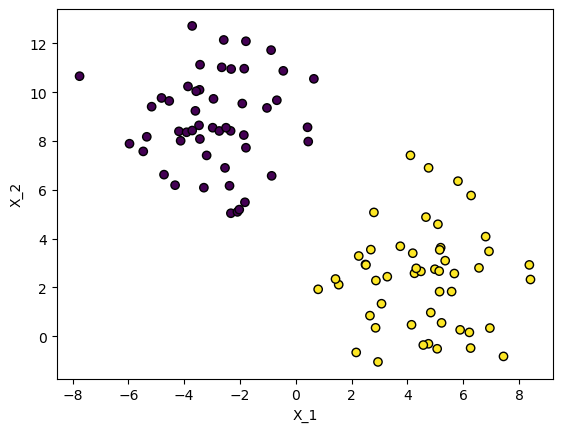

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, Y = make_blobs(n_features=2, centers=2, random_state=42, cluster_std=2.0)

plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolor='k')
plt.xlabel('X_1')
plt.ylabel('X_2');

This is then split into a tesing and training set.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

We can then investigate how the accuracy score, which measures the fraction of correct classifications, changes with the number of iterations. Intially this is for a learning rate of $\eta = 0.01$.

After around 20 iterations, we obtain full accuracy. Due to the random sampling, this occurs in large jumps.

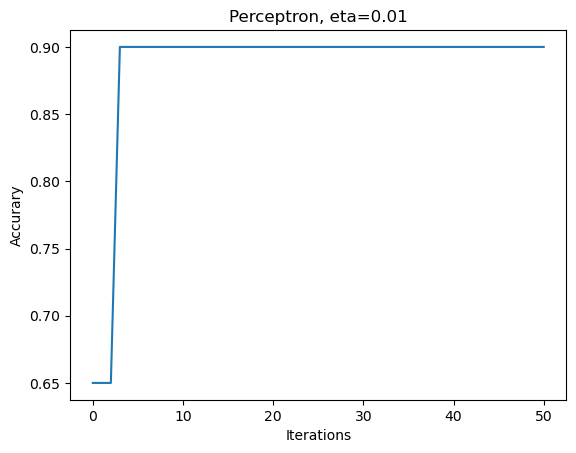

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

# start with a random distribution of the weights
wp = np.random.rand(3)
eta = 0.01
(l,m) = X_train.shape
# calculate the predictions and accuracy of the model for the test set
Y_pred = np.heaviside(wp[0]+X_test[:,0:2]@wp[1:], 1);
acc = accuracy_score(Y_test, Y_pred)
Acc = [acc]
for n in range(50):
    # take a random sample of a feature
    samp = np.random.randint(0,l)
    x = np.append([1],X_train[samp,0:2])
    # calculate the model prediction for the training set
    y_pred = np.heaviside(x@wp, 1.);
    # use this to update the weights
    wp = wp+eta*(Y_train[samp]-y_pred)*x
    # calculate the predictions and accuracy of the model for the test set
    Y_pred = np.heaviside(wp[0]+X_test[:,0:2]@wp[1:], 1);
    acc = accuracy_score(Y_test, Y_pred)
    Acc.append(acc)

# plot the accuracy
plt.plot(Acc);
plt.xlabel('Iterations')
plt.ylabel('Accurary')
plt.title('Perceptron, eta=0.01');

To investigate the model, we can plot the test predictions coloured by whether they are correct (solid black) or false (solid yellow). If the accuracy=1, these will all be solid black.

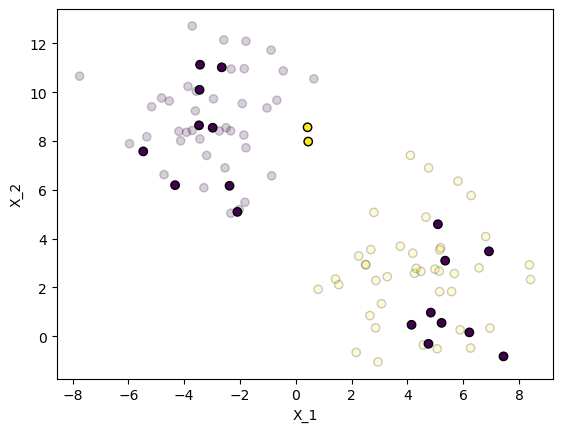

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=Y, alpha=0.2, edgecolor='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_pred-Y_test, edgecolor='k');
plt.xlabel('X_1')
plt.ylabel('X_2');

The effect of learning rate on accuracy is investigated in the cell below. As the learning rate increases, the rate of convergence of the model also increases. However, there will a critical value of learning rate after which convergence of the model will no longer occur. The other point to note is due to the randomness, the test accurary can reach 100% and then decrease from this value.

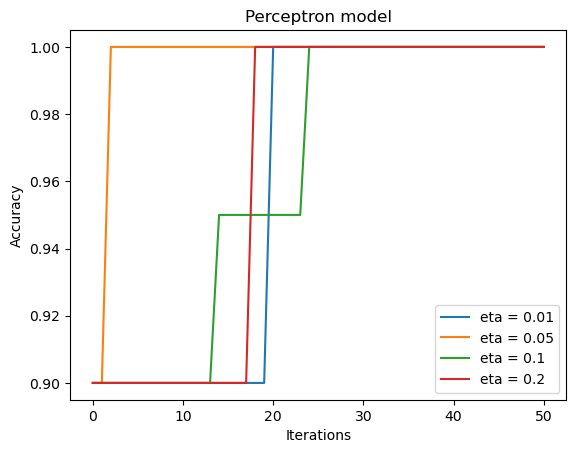

In [ ]:
# plot for different learning rates

(l,m) = X_train.shape
fig = plt.figure()
# start with a random distribution of the weights, which is used for all the eta values
wp0 = np.random.rand(3)
for eta in [.01,.05,.1,.2]:
    wp = wp0
    # calculate the predictions and accuracy of the model for the test set
    Y_pred = np.heaviside(wp[0]+X_test[:,0:2]@wp[1:], 1);
    acc = accuracy_score(Y_test, Y_pred)
    Acc = [acc]
    for n in range(50):
        # take a random sample of a feature
        samp = np.random.randint(0,l)
        x = np.append([1],X_train[samp,0:2])
        # calculate the model prediction for the training set
        y_pred = np.heaviside(x@wp, 1.);
        # use this to update the weights
        wp = wp+eta*(Y_train[samp]-y_pred)*x
        # calculate the predictions and accuracy of the model for the test set
        Y_pred = np.heaviside(wp[0]+X_test[:,0:2]@wp[1:], 1);
        acc = accuracy_score(Y_test, Y_pred)
        Acc.append(acc)
    # plot the accuracy
    plt.plot(Acc, label="eta = {:g}".format(eta))

plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Perceptron model')
plt.legend();

## Perception Cost Function

The Perceptron Model can be written in terms of the optimization of a cost (or loss) function. Let

$$
L (\mathbf{w}) = \frac{1}{n} \sum_{i=1}^n \max (0, -(2y^{(i)}-1) f(\mathbf{x}^{(i)})).
$$

The function in the summation, which in neural networks is known as the ReLU (Rectified Linear Unit) function and can be written as $\max(0,x) = xH(x)$, is shown below for the two values of $y^{(i)} = 0,1$.

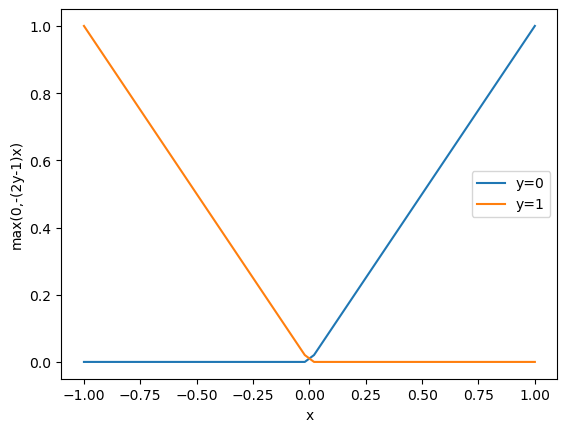

In [ ]:
x = np.linspace(-1,1)
f1 = x*np.heaviside(x,1)
f2 = -x*np.heaviside(-x,1)

plt.plot(x,f1,label="y=0")
plt.plot(x,f2,label="y=1")
plt.xlabel('x')
plt.ylabel('max(0,-(2y-1)x)')
plt.legend();

We can now calculate the derivatives of $L$ with respect to $w_j$. There are a few steps to achieve this. First, $L$ is only dependent on $w_j$ through $f(\mathbf{x}^{(i)})$. Since $f(\mathbf{x}^{(i)})$ is a linear summation

$$ \frac{\partial f(\mathbf{x}^{(i)})}{\partial w_j} = x^{(i)}_j, $$

and using that

$$ \frac{d}{dx} \max(0,x) = H(x), $$

gives

$$ \frac{\partial L}{\partial f} = -\frac{1}{n} \sum_{i=1}^n (2y^{(i)}-1) H(-(2y^{(i)}-1) f(\mathbf{x}^{(i)})). $$

Then putting this all together using the Chain Rule

$$ \frac{\partial L}{\partial w_j} = \frac{\partial L}{\partial f}\frac{\partial f}{\partial w_j} = -\frac{1}{n} \sum_{i=1}^n (2y^{(i)}-1) H(-(2y^{(i)}-1) f(\mathbf{x}^{(i)}))  x_j^{(i)}. $$

The gradient of $L$ is the vector
$$ \nabla L = \left(\frac{\partial L}{\partial w_0}, \dots , \frac{\partial L}{\partial w_n} \right), $$

then the Perceptron update rule can be written as
$$
\mathbf{w} = \mathbf{w} -\eta \nabla L(\mathbf{x}^{(k)}).
$$

To show this, again consider the various possibilities for the function

$$
-\eta \frac{\partial L}{\partial w_j} = \eta (2y^{(k)}-1) H(-(2y^{(k)}-1) f(\mathbf{x}^{(k)}))  x_j^{(k)}.
$$

In particular, we need to know the sign of

$$ h(\mathbf{x}^{(k)}) = \eta (2y^{(k)}-1) H(-(2y^{(k)}-1) f(\mathbf{x}^{(k)})). $$

If $y^{(k)}_p =0$ ($f(\mathbf{x}^{(k)}) < 0$) and $ y^{(k)} =1$, then $h=\eta$. If $y^{(k)}_p =1$ ($f(\mathbf{x}^{(k)}) \ge 0$) and $ y^{(k)} =0$, then $h=-\eta$. Finally, if $y^{(k)}_p = y^{(k)}$, then $h=0$. This gives the same results as the Perceptron update rule.

The Perceptron rule is therefore Gradient Descent for the above cost (or loss) function with one random sample used to estimate the gradient at each step. This process is known as Stochastic Gradient Descent. The advantage is that the updates are much faster than Gradient Descent and the randomness helps to address problems with local minima. The disadvantages are that this is only an approximation to the gradient, so stochasticity (randomness) is introduced into the optimization process.


To compare Gradient Descent and Stochastic Gradient Descent we can use the function that was introduced in an earlier notebook.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(gradient, start, learn_rate, n_iter=50, tolerance=1.e-6):
    '''Implements standard gradient descent'''
    vector = start
    for n in range(n_iter):
        # calculate the gradient vector and the magnitude of the change in the vector
        diff = -learn_rate * gradient(vector)
        # if this is sufficiently small, exit the calculation
        if np.sum(np.abs(diff)) <= tolerance:
            break
        # otherwise, update the vector
        vector = vector+diff
    return vector

Next we need to create functions which calculate the cost function (`PCF`) and its gradient (`PCF_grad`). For the calculation of the gradient, we introduce a parameter which determines the number of samples to use to approximate the gradient. The default for this is 1, which gives Stochastic Gradient Descent.

In [ ]:
def PCF(a, X_t, Y_t):
    '''Loss function for the Perceptron'''
    # calculate the summation for all samples
    arg = -(2*Y_t-1)*(a[0]+X_t[:,0:2]@a[1:])
    # pass this to the activation function, and calculate the mean value
    PCF = np.mean(np.max(np.heaviside(arg,1.)*arg))
    return PCF

def PCF_grad(a, Xt, Yt, batch_size=1):
    '''Gradient of the loss function for the Perceptron'''
    (l,m) = Xt.shape
    # create a random sample of the data set
    smpl = np.random.choice(l, (batch_size), replace=False)
    Y_t = Yt[smpl]
    X_t = Xt[smpl,:]
    # calculate the model prediction
    yp = np.heaviside(-(2*Y_t-1)*(a[0]+X_t[:,0:2]@a[1:]), 1.)*(2*Y_t-1)
    # multitply this the X values, then take the mean
    PCF_grad = -np.array([np.mean(yp), np.mean(yp*X_t[:,0]), np.mean(yp*X_t[:,1])])
    return PCF_grad

Now it is apparent that Gradient Descent and Stochastic Gradient Descent have a similar rate of convergence, though the convergence of Gradient Descent is much smoother. This is due to the calculation of the gradient being much more accurate. However, the cost of using Gradient Descent will be significantly larger.

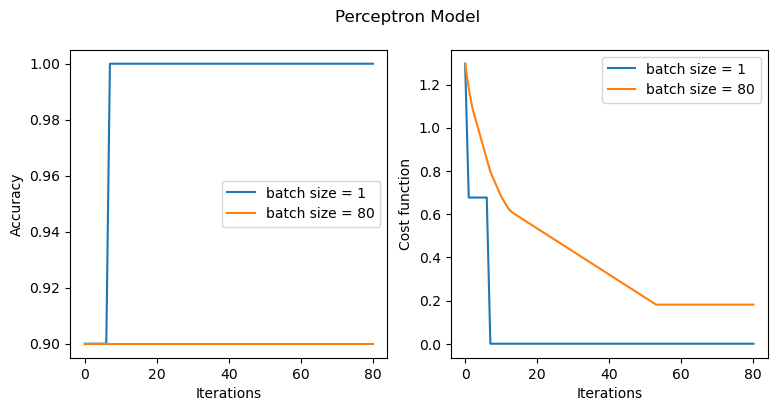

In [ ]:
# compare Gradient Descent (full batch) and Stochastic Gradient Descent (batch_size=1)
# for the Pertceptron model using a learning rate of 0.01

# set the learning rate
eta = 0.01
(l,m) = X_train.shape
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,4))
# create a random initialization of the weights to use for both calculations
wp0 = np.random.rand(3)
for bs in [1, l]: #bs=1 -> SGD, bs=l -> GD
    wp = wp0
    # calculate the accurary and cost function for the test set
    Y_pred = np.heaviside(wp[0]+X_test[:,0:2]@wp[1:], 0.5);
    acc = accuracy_score(Y_pred, Y_test)
    Acc = [acc]
    TeCF = [PCF(wp, X_test, Y_test)]
    # create a gradient function which uses the given batch size
    PCFG = lambda a: PCF_grad(a, X_train, Y_train, batch_size=bs)
    for n in range(80):
        # do one iteration of gradient descent and update the weights
        wp = gradient_descent(PCFG, wp, eta, n_iter=1)
        # calculate the accurary and cost function for the test set
        Y_pred = np.heaviside(wp[0]+X_test[:,0:2]@wp[1:], 0.5);
        acc = accuracy_score(Y_pred, Y_test)
        TeCF.append(PCF(wp, X_test, Y_test))
        Acc.append(acc)

    # plot the accuracy and cost function
    ax1.plot(Acc, label="batch size = {:g}".format(bs))
    ax2.plot(TeCF, label="batch size = {:g}".format(bs))

ax1.legend();
ax1.set(xlabel='Iterations', ylabel='Accuracy')
ax2.legend();
ax2.set(xlabel='Iterations', ylabel='Cost function')
plt.suptitle('Perceptron Model');

## Exercises

For these exercises we will use the following version of the cluster data set.

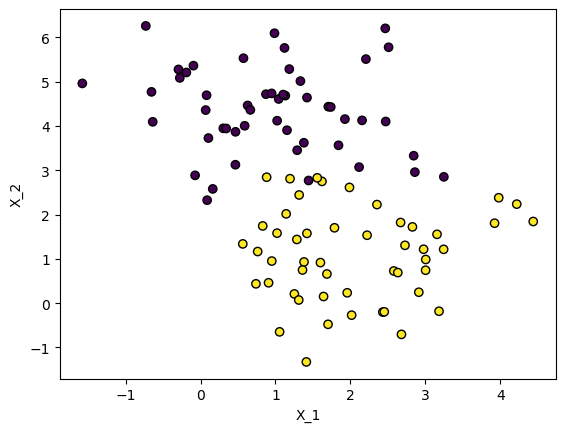

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, Y = make_blobs(n_features=2, centers=2, random_state=0, cluster_std=1.0)

plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolor='k')
plt.xlabel('X_1')
plt.ylabel('X_2');

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Exercise 1 (6 marks)

A compromise between Stochastic Gradient Descent and Gradient Descent is to use 'mini-batches', i.e., small sized samples, to approximate the gradient. This removes some of the stochasticity, but is much faster than Gradient Descent.

For the cluster data set below, compare the convergence of the Perceptron model using $\eta=0.01$ and batch sizes of 1, 10, 20 and 80. You should plot the test scores for the accuracy and the cost function.

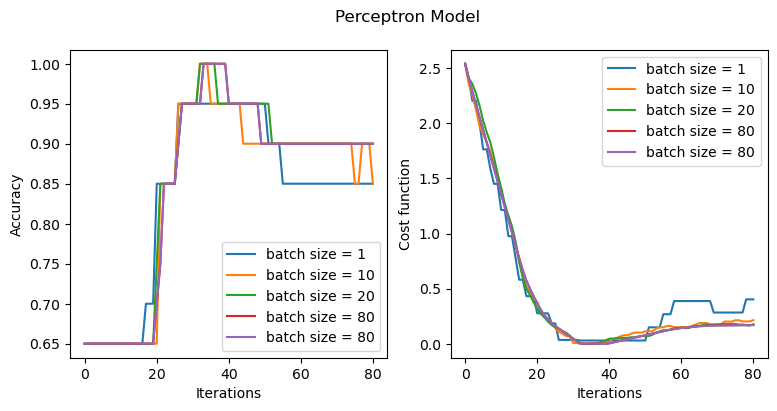

In [ ]:
def PCF(a, X_t, Y_t):
    '''Loss function for the Perceptron'''
    # calculate the summation for all samples
    arg = -(2*Y_t-1)*(a[0]+X_t[:,0:2]@a[1:])
    # pass this to the activation function, and calculate the mean value
    PCF = np.mean(np.max(np.heaviside(arg,1.)*arg))
    return PCF

def PCF_grad(a, Xt, Yt, batch_size=1):
    '''Gradient of the loss function for the Perceptron'''
    (l,m) = Xt.shape
    # create a random sample of the data set
    smpl = np.random.choice(l, (batch_size), replace=False)
    Y_t = Yt[smpl]
    X_t = Xt[smpl,:]
    # calculate the model prediction
    yp = np.heaviside(-(2*Y_t-1)*(a[0]+X_t[:,0:2]@a[1:]), 1.)*(2*Y_t-1)
    # multitply this the X values, then take the mean
    PCF_grad = -np.array([np.mean(yp), np.mean(yp*X_t[:,0]), np.mean(yp*X_t[:,1])])
    return PCF_grad



# compare Gradient Descent (full batch) and Stochastic Gradient Descent (batch_size=1)
# for the Pertceptron model using a learning rate of 0.01

# set the learning rate
eta = 0.01
(l,m) = X_train.shape
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,4))
# create a random initialization of the weights to use for both calculations
wp0 = np.random.rand(3)
for bs in [1,10,20,80, l]: #bs=1 -> SGD, bs=l -> GD
    wp = wp0
    # calculate the accurary and cost function for the test set
    Y_pred = np.heaviside(wp[0]+X_test[:,0:2]@wp[1:], 0.5);
    acc = accuracy_score(Y_pred, Y_test)
    Acc = [acc]
    TeCF = [PCF(wp, X_test, Y_test)]
    # create a gradient function which uses the given batch size
    PCFG = lambda a: PCF_grad(a, X_train, Y_train, batch_size=bs)
    for n in range(80):
        # do one iteration of gradient descent and update the weights
        wp = gradient_descent(PCFG, wp, eta, n_iter=1)
        # calculate the accurary and cost function for the test set
        Y_pred = np.heaviside(wp[0]+X_test[:,0:2]@wp[1:], 0.5);
        acc = accuracy_score(Y_pred, Y_test)
        TeCF.append(PCF(wp, X_test, Y_test))
        Acc.append(acc)

    # plot the accuracy and cost function
    ax1.plot(Acc, label="batch size = {:g}".format(bs))
    ax2.plot(TeCF, label="batch size = {:g}".format(bs))

ax1.legend();
ax1.set(xlabel='Iterations', ylabel='Accuracy')
ax2.legend();
ax2.set(xlabel='Iterations', ylabel='Cost function')
plt.suptitle('Perceptron Model');

### Exercise 2 (4 marks)

From Exercise 1, using values of batch size = 20 and $\eta = 0.01$, estimate the optimal number of iterations to halt the calculations, i.e., when is the accuracy at a maximum and the cost function at a minimum. For this number of iterations plot the model predictions.

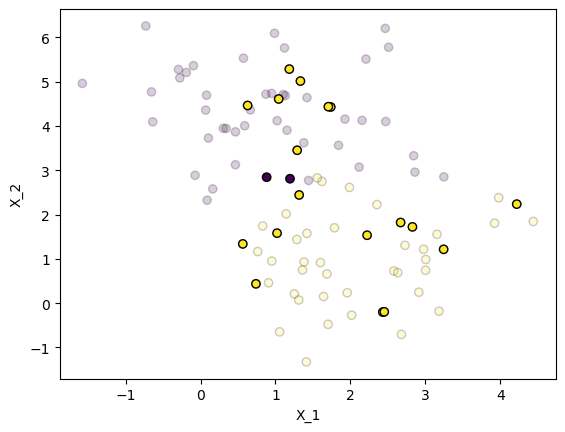

In [ ]:
eta = 0.01


wp0 = np.random.rand(3)
Y_pred = np.heaviside(wp[0]+X_test[:,0:2]@wp[1:], 0.5);

PCFG = lambda a: PCF_grad(a, X_train, Y_train, batch_size=20)

plt.scatter(X[:, 0], X[:, 1], c=Y, alpha=0.2, edgecolor='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_pred-Y_test, edgecolor='k');
plt.xlabel('X_1')
plt.ylabel('X_2');

### Generative AI Acknowledgement
If you used generative AI to assist you with these excercises, document your use below following the guidelines here: https://www.monash.edu/learnhq/build-digital-capabilities/create-online/acknowledging-the-use-of-generative-artificial-intelligence